In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import csv

In [13]:
data=input("Enter file name which contains only numeric values :")


Enter file name which contains only numeric values :E:\House_data.csv


In [14]:
fp=open(data, 'r')     #copying the address of the excel file
read=csv.reader(fp)      #reading the data from above address
print(read)

In [15]:
c=[]    #creating an empty list to insert data
f=input('Enter number of columns to be considerd :')    

Enter number of columns to be considerd :10


In [16]:
#reading number of colunms to consider(integer)
fl=[]   #creating an empty list to read the columns number
print('enter column numbers ')

enter column numbers 


In [17]:
'''Reading column numbers'''
for i in range(int(f)):     #iterates length of columns considered
    column=int(input())-1   #as index start with 0 we perform -1
    fl.append(column)   #appending the column number to a list


1
2
3
4
5
6
7
8
9
10


In [18]:
'''Appending the selected columns to a new list'''
for i in read:  #Reads every row in a dataset
    c_l=[]      #empty list to consider required colunms
    for j in fl:
        c_l.append(i[j])
    c.append(c_l)    
    #removing unwanted columns and appending required columns



In [19]:
del c[0]    #deleting the 1st row as it is index(string)

In [23]:
c

[['7129300520',
  '20141013T000000',
  '221900',
  '3',
  '1',
  '1180',
  '5650',
  '1',
  '0',
  '0'],
 ['6414100192',
  '20141209T000000',
  '538000',
  '3',
  '2.25',
  '2570',
  '7242',
  '2',
  '0',
  '0'],
 ['5631500400',
  '20150225T000000',
  '180000',
  '2',
  '1',
  '770',
  '10000',
  '1',
  '0',
  '0'],
 ['2487200875',
  '20141209T000000',
  '604000',
  '4',
  '3',
  '1960',
  '5000',
  '1',
  '0',
  '0'],
 ['1954400510',
  '20150218T000000',
  '510000',
  '3',
  '2',
  '1680',
  '8080',
  '1',
  '0',
  '0'],
 ['7237550310',
  '20140512T000000',
  '1.225e+006',
  '4',
  '4.5',
  '5420',
  '101930',
  '1',
  '0',
  '0'],
 ['1321400060',
  '20140627T000000',
  '257500',
  '3',
  '2.25',
  '1715',
  '6819',
  '2',
  '0',
  '0'],
 ['2008000270',
  '20150115T000000',
  '291850',
  '3',
  '1.5',
  '1060',
  '9711',
  '1',
  '0',
  '0'],
 ['2414600126',
  '20150415T000000',
  '229500',
  '3',
  '1',
  '1780',
  '7470',
  '1',
  '0',
  '0'],
 ['3793500160',
  '20150312T000000',
  

In [20]:
sum=0
length=len(c)   #number of rows
c1=[]
print('\nTotal fields present =',length,'\n\n')
clust=int(input('Enter number of clusters required :'))  


Total fields present = 21613 


Enter number of clusters required :10


In [25]:
import re
# Use regular expression to remove non-numerical characters
int_list_of_lists = [[int(re.sub(r'[^0-9]', '', x)) for x in inner] for inner in c]

In [26]:
#number of clusters required
kmeans = KMeans(n_clusters=clust,random_state=0).fit(int_list_of_lists)     
#predefined kMean function present in sklearn.cluster library
l=kmeans.labels_    #classified data into different clusters
s_avg=silhouette_score(int_list_of_lists,l)     #average of all clusters
# Print the average silhouette score
print("Average Silhouette Score:", s_avg)

C:\Users\Gnaneshwari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average Silhouette Score: 0.5486525931100065


In [29]:
pie=[]
for j in range(clust):  #iterations no.of clusters we have desided
    d=[]
    num=0   #to find number of fields in each cluster
    m=0
    for i in int_list_of_lists:
        if(j==l[m]):    
        #checking whether it belongs to the required cluster or not
            d.append(i)
            num=num+1 #counting no.of datasets in each cluster
        m=m+1 #incrementing for next value of l
    # finding the mean of each fields(columns) of each cluster
    per=(num / length) * 100
    print(num,'nodes are present in',j + 1,'clusters which occupies',per,'%')
    for col in range(len(d[0])):    #iterates no.of columns
        m = []
        for row in d:   #iterates no.of rows
            m.append(float(row[col]))
        print('mean of', col + 1, 'is :', np.mean(m))   
        #print the mean of each column
    pie.append(per)
    print('\n')

1957 nodes are present in 1 clusters which occupies 9.054735575810854 %
mean of 1 is : 9123125645.159428
mean of 2 is : 20140834910577.414
mean of 3 is : 1024585.9310168625
mean of 4 is : 3.363311190597854
mean of 5 is : 88.93050587634134
mean of 6 is : 2109.549821154829
mean of 7 is : 9206.302503832396
mean of 8 is : 2.9294839039345937
mean of 9 is : 0.004598875830352581
mean of 10 is : 0.22943280531425653


1268 nodes are present in 2 clusters which occupies 5.866839402211632 %
mean of 1 is : 6240073343.283912
mean of 2 is : 20150318029179.812
mean of 3 is : 825658.8217665615
mean of 4 is : 3.4006309148264986
mean of 5 is : 74.82728706624606
mean of 6 is : 2025.2318611987382
mean of 7 is : 9552.743690851736
mean of 8 is : 2.7326498422712935
mean of 9 is : 0.006309148264984227
mean of 10 is : 0.20347003154574134


2974 nodes are present in 3 clusters which occupies 13.760236894461666 %
mean of 1 is : 3719541684.0722933
mean of 2 is : 20140843052118.36
mean of 3 is : 916636.0521183591


silhouette score is 0.5486525931100065 



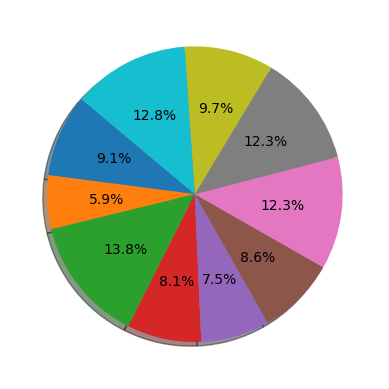

In [30]:
plt.pie(pie,autopct='%1.1f%%',shadow=True,startangle=140)   
#ploting with respect to percentage
print('silhouette score is',s_avg,'\n')
plt.show()